In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
from summit.benchmarks import SnarBenchmark
from summit.utils.dataset import DataSet
from summit.utils.multiobjective import pareto_efficient
from summit.strategies import TSEMO2
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [73]:
# Instantiate the benchmark
b = SnarBenchmark()
b.domain

Name,Type,Description,Values
tau,"continuous, input",residence time in minutes,"[0.5,2]"
equiv_pldn,"continuous, input",equivalents of pyrrolidine,"[1.5,3.5]"
conc_dfnb,"continuous, input","concentration of 2,4 dinitrofluorobenenze at reactor inlet (after mixing) in M","[0.1,0.28]"
temperature,"continuous, input",Reactor temperature in degress celsius,"[30,120]"
sty,"continuous, maximize objective",space time yield (kg/m^3/h),"[0,100]"
e_factor,"continuous, minimize objective",E-factor,"[0,1000000.0]"


In [79]:
# Create some test conditions
b.reset()
columns = [v.name for v in b.domain.variables]
values  =   {('tau', 'DATA'): 0.5,  # minutes
             ('equiv_pldn', 'DATA'): 1.5,  
             ('conc_dfnb', 'DATA'): 0.1, #molar
             ('temperature', 'DATA'): 30.0, # degrees celsius
              }
conditions = DataSet([values], columns=columns)

# Run the conditions
results = b.run_experiments(conditions)
results

,tau,equiv_pldn,conc_dfnb,temperature,sty,e_factor,computation_time,experiment_time
0,0.5,1.5,0.1,30.0,1859.50836,1.771402,0.0,0.010527


We start by creating instantiating the benchmark. We then create some conditions in a summit DatSet. The values dictionary has tuples that specify the type of columns (DATA vs. METADATA).  Finally, we run the virtual experiment, which integrates the kinetic equations at the conditions given. The results are printed out.

We can see that these conditions give a relatively low space-time yield (a good value would be around 10,000 kg/m^3/h) and high E-factor (a good value would be <1).  So, let's try to optimze the conditions. We'll start with latin hypercube sampling and then use TSEMO. Note that the this will take a little while.

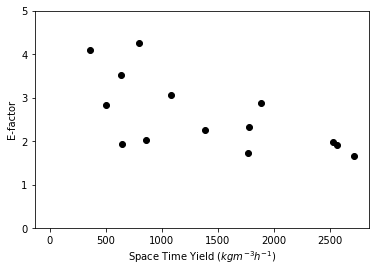

TSEMO iteration  6


 /Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-TfmmV07p-py3.7/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-TfmmV07p-py3.7/lib/python3.7/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


TSEMO iteration  7


AttributeError: 'ModelGroup' object has no attribute '_previous_x'

In [78]:
# Reset the benchmark and instantiate TSEMO
b.reset()
tsemo = TSEMO2(b.domain)
names = [r'Space Time Yield ($kg m^{-3} h^{-1}$)', 'E-factor']

# Get initial experiments. TSEMO uses latin hypercube for initial designs
print("Starting initial design")
experiments = tsemo.suggest_experiments(30)
results = b.run_experiments(experiments)

# Plot initial experiments
fig, ax = b.pareto_plot()
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
plt.show(fig)

#Run TSEMO
for i in range(20):
    print("TSEMO iteration ", i)
    experiments = tsemo.suggest_experiments(1, previous_results=results)
    results = b.run_experiments(experiments)
    
    #Clear previous plot and replot
    if i % 5 == 0:
        clear_output(wait=True)
        fig, ax = b.pareto_plot()
        ax.set_xlabel(names[0])
        ax.set_ylabel(names[1])
        ax.set_ylim(0, 5)
        plt.show(fig)